# STUDENT - what is going on below?

You need to read this Notebook and assume that a colleague has asked you for a code review. What is potentially most damaging to their ongoing productivity and correctness? 

* Are there examples of unnecessary repetition?
* Are there bad naming standards which makes the code look "non-Pythonic"?
* Can you interpret their method and results clearly?

----

# Analysis of household air-moisture levels

As part of an ongoing analysis to derive metadata from a timeseries we're using some household data at the 1 minute level to display temperature & humidity levels in our house in 2 rooms.

We then back-calculate the moisture level (grams per metre cubed) for the actual amount of water in a cubed meter or air near the sensor, to get an understanding of where the most or least water is in the house and which household events affect these levels.

We can use similar processes to derive signals for work-releated problems on our own timeseries data, this analysis combines both work and play and will be used as an internal proof-of-concept to get sign-off from the team for running a similar project on internal business data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np


from src.utility import make_max_water_by_temp_dataframe
from src.utility import set_common_mpl_styles, add_actual_water_content, make_estimated_water_plot

FILENAME_KITCHEN = "Kitchen_export_202112311652.pickle"
FILENAME_HALL = "First floor hall_export_202112311700.pickle"
FILENAME_BACK_ROOM = "Dog room_export_202112311653.pickle"
FILENAME_LIVING_ROOM = "Living Room_export_202112311656.pickle"
FILENAME_ROOF_OFFICE = "Roof Office_export_202112311626.pickle"

DATA_FOLDER = '../data/processed'
filename = os.path.join(DATA_FOLDER, FILENAME_KITCHEN)

# Load data

In [2]:
def load_data(filename):
    print(f"Loading from {filename}")
    return pd.read_pickle(filename)

In [3]:
df_30min = load_data(filename)

# now let's choose a day
day1 = "2021-12-24"
day2 = "2021-12-25"

start_time = f"{day1} 20:00"
end_time = f"{day2} 10:00"

print(f"Working on {day1} - {day2}")
assert pd.to_datetime(start_time) > df_30min.index.min(), "Must be in date range"
assert pd.to_datetime(end_time) < df_30min.index.max(), "Must be in date range"

#df_30min = df.resample("30min").mean()
df_30min.head()

Loading from ../data/processed/Kitchen_export_202112311652.pickle
Working on 2021-12-24 - 2021-12-25


,t_c,rh,max_water_gm3,est_water_gm3
timestamp,,,,
2021-12-22 17:00:00,13.916667,48.226667,11.950324,5.763218
2021-12-22 17:30:00,13.756667,48.800000,11.802490,5.759702
2021-12-22 18:00:00,13.860000,51.653333,11.857554,6.130022
2021-12-22 18:30:00,14.760000,53.906667,12.561573,6.771200
2021-12-22 19:00:00,15.053333,52.816667,12.760627,6.739824


In [4]:
# REMOVED DUPLICATION (DRY!)
#df_moisture = make_max_water_by_temp_dataframe()
#df_30min_water = add_actual_water_content(df_30min, df_moisture)
#df_30min_water.head()

In [5]:
print(f"Querying between {start_time} and {end_time}")
dfx = df_30min.query('timestamp > @start_time and timestamp < @end_time')

Querying between 2021-12-24 20:00 and 2021-12-25 10:00


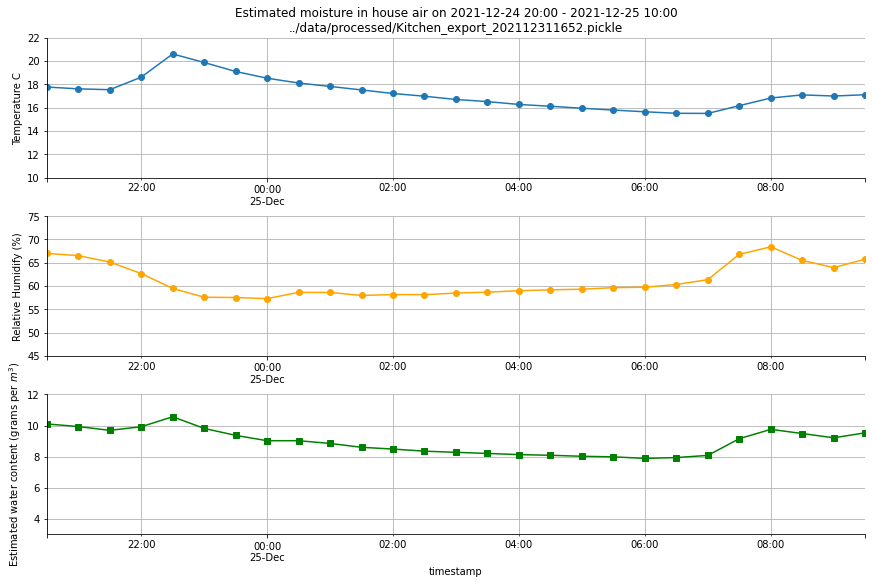

In [6]:
make_estimated_water_plot(dfx, filename, f"{start_time} - {end_time}")